<a href="https://colab.research.google.com/github/OWEN-JUN/keras_/blob/master/keras32_homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import * #sequential
from keras.layers import * #dense, dropout, flatten, conv2d, maxpooling2d
from keras.callbacks import * #modelcheckpoint, earlystopping

import matplotlib.pyplot as plt
import numba
import os
import tensorflow as tf

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


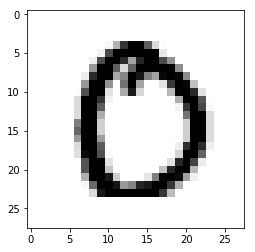

In [2]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()
digit = x_train[88]
plt.imshow(digit, cmap=plt.cm.binary)

x_train = x_train.reshape(x_train.shape[0],28,28,1).astype("float32")/255

x_test = x_test.reshape(x_test.shape[0],28,28,1).astype("float32")/255

y_train= np_utils.to_categorical(y_train)

y_test= np_utils.to_categorical(y_test)



In [0]:
model = Sequential()

W0729 06:24:05.797095 139858669565824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
#conv 신경망 설정

model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


early_stoping_callback = EarlyStopping(monitor="val_loss",patience=10)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 30, batch_size=200, verbose=2, callbacks=[early_stoping_callback])

print("\n test acc: %.4f"%(model.evaluate(x_test, y_test)[1]))

W0729 06:24:05.949813 139858669565824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 06:24:05.959654 139858669565824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 06:24:06.011092 139858669565824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0729 06:24:06.018471 139858669565824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0729 06:24:06.031158 139858669565824 de

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 13s - loss: 0.2770 - acc: 0.9157 - val_loss: 0.0554 - val_acc: 0.9813
Epoch 2/30
 - 7s - loss: 0.0931 - acc: 0.9724 - val_loss: 0.0374 - val_acc: 0.9868
Epoch 3/30
 - 7s - loss: 0.0671 - acc: 0.9802 - val_loss: 0.0312 - val_acc: 0.9890
Epoch 4/30
 - 7s - loss: 0.0551 - acc: 0.9837 - val_loss: 0.0296 - val_acc: 0.9896
Epoch 5/30
 - 7s - loss: 0.0481 - acc: 0.9853 - val_loss: 0.0334 - val_acc: 0.9898
Epoch 6/30
 - 7s - loss: 0.0398 - acc: 0.9875 - val_loss: 0.0296 - val_acc: 0.9908
Epoch 7/30
 - 7s - loss: 0.0367 - acc: 0.9886 - val_loss: 0.0302 - val_acc: 0.9901
Epoch 8/30
 - 7s - loss: 0.0323 - acc: 0.9899 - val_loss: 0.0279 - val_acc: 0.9909
Epoch 9/30
 - 7s - loss: 0.0297 - acc: 0.9904 - val_loss: 0.0299 - val_acc: 0.9913
Epoch 10/30
 - 7s - loss: 0.0286 - acc: 0.9907 - val_loss: 0.0260 - val_acc: 0.9919
Epoch 11/30
 - 7s - loss: 0.0232 - acc: 0.9923 - val_loss: 0.0268 - val_acc: 0.9909
Epoch 12/30
 - 7s - loss: 0.0237 -

In [0]:
inputs = Input(shape=(28,28,1), name="input")
x = Conv2D(32,kernel_size=(3,3),activation="relu")(inputs)
x = Dropout(0.2)(x)
x = Conv2D(64,(3,3),activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(256, activation="relu", name="hidden2")(x)
x = Dropout(0.2)(x)
x = Dense(128, activation="relu", name="hidden3")(x)
x = Dropout(0.2)(x)
prediction = Dense(10, activation="softmax", name="output")(x)
model = Model(input = inputs, outputs=prediction)
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


early_stoping_callback = EarlyStopping(monitor="val_loss",patience=10)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 30, batch_size=50, verbose=2,callbacks=[early_stoping_callback])

print("\n test acc: %.4f"%(model.evaluate(x_test, y_test)[1]))
early_stoping_callback = EarlyStopping(monitor="val_loss",patience=10)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 30, batch_size=200, verbose=2, callbacks=[early_stoping_callback])

print("\n test acc: %.4f"%(model.evaluate(x_test, y_test)[1]))


W0802 00:03:40.591597 140091636844416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 00:03:40.650798 140091636844416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 00:03:40.652812 140091636844416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 00:03:40.696410 140091636844416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0802 00:03:40.711791 

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 26s - loss: 0.1718 - acc: 0.9466 - val_loss: 0.0597 - val_acc: 0.9816
Epoch 2/30
 - 19s - loss: 0.0582 - acc: 0.9827 - val_loss: 0.0438 - val_acc: 0.9859
Epoch 3/30
 - 20s - loss: 0.0414 - acc: 0.9877 - val_loss: 0.0313 - val_acc: 0.9900
Epoch 4/30
 - 20s - loss: 0.0331 - acc: 0.9894 - val_loss: 0.0360 - val_acc: 0.9898
Epoch 5/30
 - 18s - loss: 0.0267 - acc: 0.9919 - val_loss: 0.0303 - val_acc: 0.9909
Epoch 6/30
 - 18s - loss: 0.0213 - acc: 0.9939 - val_loss: 0.0356 - val_acc: 0.9908
Epoch 7/30
 - 19s - loss: 0.0190 - acc: 0.9939 - val_loss: 0.0323 - val_acc: 0.9922
Epoch 8/30
 - 18s - loss: 0.0169 - acc: 0.9948 - val_loss: 0.0380 - val_acc: 0.9902
Epoch 9/30
 - 18s - loss: 0.0157 - acc: 0.9951 - val_loss: 0.0338 - val_acc: 0.9913
Epoch 10/30
 - 18s - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0384 - val_acc: 0.9898
Epoch 11/30
 - 18s - loss: 0.0121 - acc: 0.9962 - val_loss: 0.0448 - val_acc: 0.9894
Epoch 12/30
